# Face Fask Detection

## Import Data

In [1]:
#Imports
import cv2 #import opencv
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl
import statistics as st
import random

In [2]:
#Constants
FOLDER = "data/"
wm = "with_mask"
nm = "without_mask"
fp_wm =  os.path.join(FOLDER,wm)
fp_nm =  os.path.join(FOLDER,nm)

In [3]:
print(fp_wm)

data/with_mask


In [4]:
print(fp_nm)

data/without_mask


## Data Exploration

In [5]:
#Count Number of Images
withMaskFiles = os.listdir(fp_wm)
noMaskFiles = os.listdir(fp_nm)
countWith = len(withMaskFiles)
countWithOut = len(noMaskFiles)

In [6]:
print("Total Number of Images: " + str(countWith + countWithOut) + "\nCount of Images with masks: " + str(countWith) + "\nCount of Images without masks: " + str(countWithOut))


Total Number of Images: 7553
Count of Images with masks: 3725
Count of Images without masks: 3828


<Figure size 1200x800 with 0 Axes>

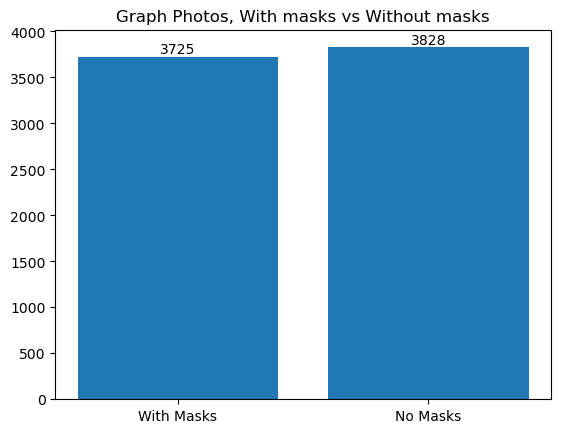

In [7]:
#Graph breakdown

label = np.array(["With Masks", "No Masks"])
value = np.array([countWith, countWithOut])

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(label, value, color="skyblue")

# Adding value labels to the bars
for bar, val in zip(bars, value):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(val, 2)),
            ha='center', va='bottom')
    
plt.title("Graph Photos, With masks vs Without masks")
plt.bar(label,value)
plt.show()

In [8]:
# Get File Names and check attributes
withMaskFiles[0]

'with_mask_673.jpg'

In [9]:
# Use OpenCV to read file (cv2.COLOR_BGR2RGB this needed as OPENCV reverse RGB colors)
img = cv2.imread(os.path.join(fp_wm, withMaskFiles[0]))

In [10]:
# Image shape 268x168 pixels, 3 color channels
img.shape

(266, 168, 3)

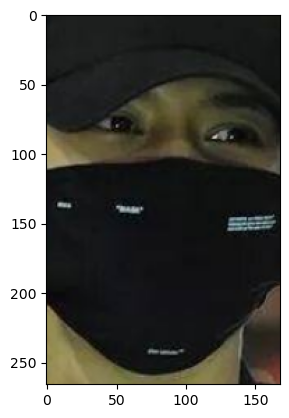

In [11]:
# Plot image #Convert from bgr to rgb
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
# Ok now lets check all img properties of with masks
property_wm_list = []
for img in os.listdir(fp_wm):
    img_props = cv2.imread(os.path.join(fp_wm , img))
    property_wm_list.append([img_props.shape ,img.split(".")[-1]])      

    

In [13]:
# View shapes and suffix
for shape in property_wm_list:
    print(shape)

[(266, 168, 3), 'jpg']
[(227, 222, 3), 'jpg']
[(127, 99, 3), 'jpg']
[(433, 320, 3), 'jpg']
[(164, 121, 3), 'jpg']
[(204, 123, 3), 'jpg']
[(72, 49, 3), 'jpg']
[(169, 299, 3), 'jpg']
[(225, 225, 3), 'jpg']
[(428, 320, 3), 'jpg']
[(270, 187, 3), 'jpg']
[(428, 320, 3), 'jpg']
[(728, 491, 3), 'jpg']
[(3264, 4912, 3), 'jpg']
[(231, 162, 3), 'jpg']
[(174, 289, 3), 'jpg']
[(234, 216, 3), 'jpg']
[(1000, 1000, 3), 'jpg']
[(214, 236, 3), 'jpg']
[(675, 450, 3), 'jpg']
[(156, 98, 3), 'jpg']
[(246, 205, 3), 'jpg']
[(3000, 3000, 3), 'jpg']
[(810, 1060, 3), 'jpg']
[(225, 225, 3), 'jpg']
[(259, 194, 3), 'jpg']
[(143, 97, 3), 'jpg']
[(259, 194, 3), 'jpg']
[(103, 76, 3), 'jpg']
[(239, 211, 3), 'jpg']
[(69, 52, 3), 'jpg']
[(81, 56, 3), 'jpg']
[(428, 320, 3), 'jpg']
[(1176, 877, 3), 'jpg']
[(225, 225, 3), 'jpg']
[(96, 76, 3), 'jpg']
[(168, 299, 3), 'jpg']
[(349, 357, 3), 'jpg']
[(225, 225, 3), 'jpg']
[(134, 100, 3), 'jpg']
[(275, 183, 3), 'jpg']
[(70, 41, 3), 'jpg']
[(100, 100, 3), 'jpg']
[(183, 275, 3), '

In [14]:
# Get range of picture sizes for x
wm_min_x = min(i[0][0] for i in property_wm_list)
wm_max_x = max(i[0][0] for i in property_wm_list)
wm_mean_x = st.mean(i[0][0] for i in property_wm_list)

In [15]:
# Get range of picture sizes for y
wm_min_y = min(i[0][1] for i in property_wm_list)
wm_max_y = max(i[0][1] for i in property_wm_list)
wm_mean_y = st.mean(i[0][1] for i in property_wm_list)

In [16]:
# Ok now lets check all img properties of no mask
property_nm_list = []
for img in os.listdir(fp_nm):
    img_props = cv2.imread(os.path.join(fp_nm , img))
    property_nm_list.append([img_props.shape ,img.split(".")[-1]])      


In [17]:
# View shapes and suffix
for shape in property_nm_list:
    print(shape)

[(131, 160, 3), 'jpg']
[(194, 259, 3), 'jpg']
[(168, 300, 3), 'jpg']
[(428, 320, 3), 'jpg']
[(150, 151, 3), 'jpg']
[(194, 259, 3), 'jpg']
[(259, 194, 3), 'jpg']
[(121, 127, 3), 'jpg']
[(275, 183, 3), 'jpg']
[(141, 149, 3), 'jpg']
[(147, 125, 3), 'jpg']
[(194, 259, 3), 'jpg']
[(282, 178, 3), 'jpg']
[(225, 225, 3), 'jpg']
[(100, 100, 3), 'jpg']
[(224, 225, 3), 'jpg']
[(217, 232, 3), 'jpg']
[(194, 259, 3), 'jpg']
[(433, 320, 3), 'jpg']
[(225, 225, 3), 'jpg']
[(138, 128, 3), 'jpg']
[(280, 180, 3), 'jpg']
[(169, 299, 3), 'jpg']
[(222, 227, 3), 'jpg']
[(433, 320, 3), 'jpg']
[(283, 250, 3), 'jpg']
[(121, 149, 3), 'jpg']
[(140, 145, 3), 'jpg']
[(281, 179, 3), 'jpg']
[(800, 450, 3), 'jpg']
[(225, 225, 3), 'jpg']
[(246, 205, 3), 'jpg']
[(428, 320, 3), 'jpg']
[(194, 259, 3), 'jpg']
[(279, 181, 3), 'jpg']
[(174, 290, 3), 'jpg']
[(275, 183, 3), 'jpg']
[(168, 300, 3), 'jpg']
[(157, 155, 3), 'jpg']
[(169, 299, 3), 'jpg']
[(275, 183, 3), 'jpg']
[(252, 200, 3), 'jpg']
[(120, 155, 3), 'jpg']
[(162, 310,

In [18]:
# Get range of picture sizes for x
nm_min_x = min(i[0][0] for i in property_nm_list)
nm_max_x = max(i[0][0] for i in property_nm_list)
nm_mean_x = st.mean(i[0][0] for i in property_nm_list)

In [19]:
# Get range of picture sizes for y
nm_min_y = min(i[0][1] for i in property_nm_list)
nm_max_y = max(i[0][1] for i in property_nm_list)
nm_mean_y = st.mean(i[0][1] for i in property_nm_list)

<Figure size 1200x800 with 0 Axes>

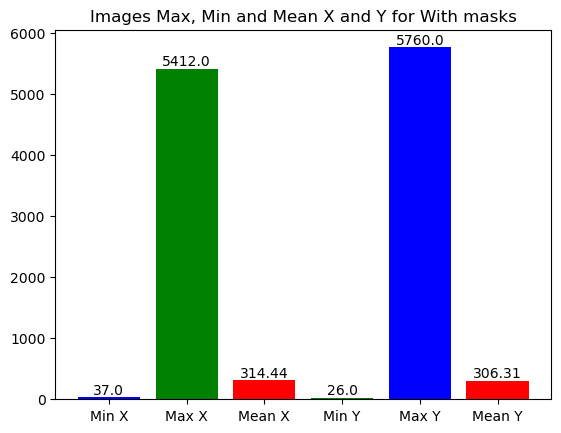

In [20]:
# Plot max and min of with and with mask
label = np.array(["Min X", "Max X", "Mean X", "Min Y", "Max Y", "Mean Y"])
value = np.array([wm_min_x, wm_max_x, wm_mean_x, wm_min_y, wm_max_y, wm_mean_y])

# Define colors for max, min, and mean bars
colors = ['blue', 'green', 'red', 'green', 'blue', 'red']

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(label, value, color=colors)

# Adding value labels to the bars
for bar, val in zip(bars, value):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(val, 2)),
            ha='center', va='bottom')

plt.title("Images Max, Min and Mean X and Y for With masks")
plt.show()


<Figure size 1200x800 with 0 Axes>

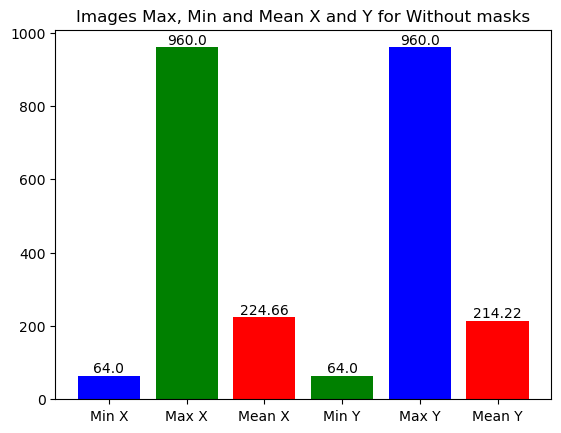

In [21]:
# Plot max and min of with and with out mask
label = np.array(["Min X", "Max X", "Mean X", "Min Y", "Max Y", "Mean Y"])
value = np.array([nm_min_x, nm_max_x, nm_mean_x, nm_min_y, nm_max_y, nm_mean_y])

# Define colors for max, min, and mean bars
colors = ['blue', 'green', 'red', 'green', 'blue', 'red']

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(label, value, color=colors)

# Adding value labels to the bars
for bar, val in zip(bars, value):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(val, 2)),
            ha='center', va='bottom')

plt.title("Images Max, Min and Mean X and Y for Without masks")
plt.show()

## Data Preprocessing

### Create function to size data to input layer

In [22]:
training_data = []
sub_folders = os.listdir(FOLDER)
for folder in sub_folders:
    path = os.path.join(FOLDER, folder)
    classes = sub_folders.index(folder) #0,1 -> label for binary classification
    for img in os.listdir(path):
        # Read to array
        img_arr = cv2.imread(os.path.join(path,img))
        torgb = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
        resize = cv2.resize(torgb,(225,225))
        training_data.append([resize, classes])
        break
print(training_data)

[[array([[[ 28,  32,  34],
        [ 27,  30,  32],
        [ 25,  29,  31],
        ...,
        [ 25,  27,  22],
        [ 23,  25,  20],
        [ 22,  24,  19]],

       [[ 27,  31,  32],
        [ 24,  28,  29],
        [ 22,  26,  27],
        ...,
        [ 24,  27,  21],
        [ 24,  27,  21],
        [ 24,  26,  21]],

       [[ 25,  29,  30],
        [ 22,  26,  27],
        [ 20,  24,  25],
        ...,
        [ 24,  26,  21],
        [ 24,  26,  21],
        [ 24,  26,  21]],

       ...,

       [[147, 137,  84],
        [146, 136,  81],
        [148, 136,  80],
        ...,
        [122,  70,  54],
        [125,  70,  56],
        [127,  70,  56]],

       [[149, 139,  85],
        [147, 136,  80],
        [148, 135,  78],
        ...,
        [120,  73,  58],
        [123,  73,  59],
        [127,  74,  60]],

       [[149, 138,  86],
        [146, 135,  80],
        [148, 135,  77],
        ...,
        [118,  76,  62],
        [122,  78,  64],
        [129,  82,  68

In [23]:
def create_training_data(pixelWidth, pixelHeight,folder):
    training_data = []
    sub_folders = os.listdir(FOLDER)
    for folder in sub_folders:
        path = os.path.join(FOLDER, folder)
        classes = sub_folders.index(folder) #0,1 -> label for binary classification
        for img in os.listdir(path):
            try:
                # Read to array
                img_arr = cv2.imread(os.path.join(path,img))
                # BGR to RGB
                torgb = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
                # Resize
                resize = cv2.resize(torgb,(pixelWidth,pixelHeight))
                # Place in array
                training_data.append([resize, classes])
            except Exception as e:
                pass 
    return training_data

In [24]:
# Test function
td = []
td = create_training_data(224,224,FOLDER)

In [25]:
len(td)                


7553

In [26]:
len(td[0])

2

In [27]:
td[0][0]

array([[[ 28,  32,  34],
        [ 26,  30,  32],
        [ 25,  28,  31],
        ...,
        [ 25,  27,  22],
        [ 23,  25,  20],
        [ 22,  24,  19]],

       [[ 27,  31,  32],
        [ 24,  28,  29],
        [ 22,  26,  27],
        ...,
        [ 24,  26,  22],
        [ 24,  26,  22],
        [ 24,  26,  21]],

       [[ 25,  29,  30],
        [ 22,  26,  27],
        [ 20,  24,  25],
        ...,
        [ 24,  26,  21],
        [ 24,  26,  21],
        [ 24,  26,  21]],

       ...,

       [[146, 137,  83],
        [146, 135,  81],
        [148, 136,  80],
        ...,
        [122,  70,  54],
        [125,  70,  56],
        [127,  70,  56]],

       [[149, 139,  86],
        [147, 135,  80],
        [148, 135,  78],
        ...,
        [120,  73,  58],
        [123,  73,  59],
        [127,  74,  60]],

       [[149, 138,  86],
        [147, 135,  80],
        [148, 135,  77],
        ...,
        [118,  76,  62],
        [122,  78,  64],
        [129,  82,  68]]

### Shuffle data

In [28]:
random.shuffle(td)

### Split labels and features

In [29]:
x = []
y = []
for data,label in td:
    x.append(data)
    y.append(label)

### Convert x,y values to numpy array

In [30]:
X = np.array(x).reshape(-1,224,224,3)

In [31]:
X.shape

(7553, 224, 224, 3)

In [32]:
Y = np.array(y)

## Output data to file

In [33]:
pickle_out = open("X.pickle", "wb")
pl.dump(X, pickle_out)
pickle_out.close()

In [34]:
pickle_out = open("Y.pickle", "wb")
pl.dump(Y, pickle_out)
pickle_out.close()